In [1]:
stockName = 'ZOOM'

In [2]:
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re

def translate(senti):
    if int(senti) == 0:
        print('positive')
    elif int(senti) == 1:
        print('neutral')
    else :
        print('negative')

df = pd.read_csv('all-data.csv',delimiter=',',encoding='latin-1')
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Message'})
md2 = load_model('saved.h5')
tokenizer = Tokenizer(num_words=500000, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Message'].values)
def sentiment_ana(message):

#     print(type(message))
    seq = tokenizer.texts_to_sequences(message)

    padded = pad_sequences(seq, maxlen=50, dtype='int32', value=0)
#
    pred = md2.predict(padded)

    labels = ['0','1','2']

    print(np.argmax(pred))
    return np.argmax(pred)


In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd

wd = webdriver.Chrome(r'C:\Users\Jiaqi\Downloads\chromedriver_win32\chromedriver.exe')
# 需要安装浏览器引擎(https://chromedriver.storage.googleapis.com/index.html)
wd.implicitly_wait(5)  # 最长等待时间


def getInformation(stockName):
    titleList = []
    summaryList = []
    ##Google搜索股票
#     wd.get("https://www.google.com/")
    wd.get(
        "https://www.google.com/?gl=us&hl=en&gws_rd=cr&pws=0"
#         "https://news.google.com/topstories?hl=en-US&gl=US&ceid=US:en"
    )
    inputElement = wd.find_element(By.XPATH, "//input[@class = 'gLFyf gsfi']")  # 寻找搜索框元素
    inputElement.send_keys(stockName)  # 输入搜索内容
    enterElement = wd.find_element(By.XPATH, "//input[@class = 'gNO89b']").click()  # 输入回车
    newsElement = wd.find_element(By.XPATH,"//div[@class = 'MUFPAc']//a[text()='News']").click()#限定在“新闻”内
    ##获取每页新闻及摘要
    for i in range(30):
        for j in range(1, 11):
            title = wd.find_element(By.XPATH,
                                    "//div[@class = 'v7W49e']/div[{0}]//div[@class = 'mCBkyc y355M ynAwRc MBeuO nDgy9d']".format(
                                        j)).text
            summary = wd.find_element(By.XPATH,
                                      "//div[@class = 'v7W49e']/div[{0}]//div[@class = 'GI74Re nDgy9d']".format(j)).text
            titleList += [title]
            summaryList += [summary]
            j += 1
        next = wd.find_element(By.XPATH, "//td[@class = 'YyVfkd']//following-sibling::td[1]").click()

    return [titleList, summaryList]


# print([t,s])
# [t, s]
[t, s] = getInformation(stockName)


C:\Users\Jiaqi\AppData\Local\Temp\ipykernel_22248\353171369.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome(r'C:\Users\Jiaqi\Downloads\chromedriver_win32\chromedriver.exe')


In [4]:
data = pd.DataFrame([t,s])
data = data.T
data = data.rename(columns={0:'Title',1:'Message'})
data


,Title,Message
0,Zoom brings end-to-end encryption to its cloud...,Zoom is bolstering its privacy and security pr...
1,Official Images Of The Nike Zoom Freak 4,"Recently, Nike Basketball and Giannis Antetoko..."
2,"How Much Of Zoom Video Communications, Inc. (N...",A look at the shareholders of Zoom Video Commu...
3,Fonoa raises $60M to automate tax compliance f...,"Fonoa, a tax automation platform used by compa..."
4,Nike Air Zoom Mercurial Enters The Rocket Leag...,Rocket League teams up with Nike to create the...
...,...,...
295,How to use the new Zoom Whiteboard for hybrid ...,A new whiteboard product from Zoom differs fro...
296,Virtual meetings have a creativity cost,All those Zoom meetings could be stunting inno...
297,Zoom Hires Greg Tomb as President,"SAN JOSE, Calif., June 06, 2022 (GLOBE NEWSWIR..."
298,Zoom class-action lawsuit: You might be owed m...,Have you ever used Zoom for video meetings? If...


In [5]:
def cleanText(text):
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

data['Message'] = data['Message'].apply(cleanText)

data = pd.DataFrame(data["Message"])
data = data.rename(columns={0:'Message'})
# data.insert(loc=0, column='sentiment', value=)





positive=0
negative=0
neutral=0
print(data)
temp_sentiment = []
for index,row in data.iterrows():
    sentiment = sentiment_ana([row['Message']])
    if sentiment == 0:
        positive += 1
    elif sentiment == 2:
        negative += 1
    else :
        neutral += 1
    temp_sentiment.append(sentiment)
    
    
print(temp_sentiment)

    
# 	if row['sentiment'] == -1:
# 		row['sentiment']=sentiment_ana(row[])
#         print(row['Message'])
# data.ix[sentiment]
# for message in messages:
#     sentiment = sentiment_ana([message])
#     if sentiment == 0:
#         positive += 1
#         pos_mess.append(str(message))
#     elif sentiment == 2:
#         negative += 1
#         negative.append(str(message))
#     else :
#         neutral += 1


                                               Message
0    zoom is bolstering its privacy and security pr...
1    recently, nike basketball and giannis antetoko...
2    a look at the shareholders of zoom video commu...
3    fonoa, a ta automation platform used by compan...
4    rocket league teams up with nike to create the...
..                                                 ...
295  a new whiteboard product from zoom differs fro...
296  all those zoom meetings could be stunting inno...
297  san jose, calif., june 06, 2022 (globe newswir...
298  have you ever used zoom for video meetings? if...
299  google's project zero vulnerability research t...

[300 rows x 1 columns]
1/1 [==============================] - 0s 475ms/step
0
1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 19ms/step
2
1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 20ms/step
0
1/1 [==============================] - 0s 19m

1/1 [==============================] - 0s 23ms/step
1
1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 18ms/step
0
1/1 [==============================] - 0s 19ms/step
0
1/1 [==============================] - 0s 23ms/step
0
1/1 [==============================] - 0s 20ms/step
1
1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 20ms/step
0
1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 25ms/step
1
1/1 [==============================] - 0s 21ms/step
0
1/1 [==============================] - 0s 20ms/step
1
1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 20ms/step
1
1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 19ms/step
1
1/1 [=======================

1/1 [==============================] - 0s 14ms/step
1
1/1 [==============================] - 0s 15ms/step
1
1/1 [==============================] - 0s 14ms/step
0
1/1 [==============================] - 0s 13ms/step
1
1/1 [==============================] - 0s 15ms/step
1
1/1 [==============================] - 0s 14ms/step
1
1/1 [==============================] - 0s 16ms/step
1
1/1 [==============================] - 0s 14ms/step
1
1/1 [==============================] - 0s 15ms/step
1
1/1 [==============================] - 0s 15ms/step
1
[0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 

In [6]:
data.insert(loc=0, column='sentiment', value=temp_sentiment)


In [7]:
print(data)

     sentiment                                            Message
0            0  zoom is bolstering its privacy and security pr...
1            1  recently, nike basketball and giannis antetoko...
2            2  a look at the shareholders of zoom video commu...
3            1  fonoa, a ta automation platform used by compan...
4            0  rocket league teams up with nike to create the...
..         ...                                                ...
295          1  a new whiteboard product from zoom differs fro...
296          1  all those zoom meetings could be stunting inno...
297          1  san jose, calif., june 06, 2022 (globe newswir...
298          1  have you ever used zoom for video meetings? if...
299          1  google's project zero vulnerability research t...

[300 rows x 2 columns]


In [8]:
print('positive is '+str(positive))
# print('neutral is '+str(neutral))
print('negative is '+str(negative))

positive is 77
negative is 21


In [9]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
print(data.head())

   sentiment                                            Message  \
0          0  zoom is bolstering its privacy and security pr...   
1          1  recently, nike basketball and giannis antetoko...   
2          2  a look at the shareholders of zoom video commu...   
3          1  fonoa, a ta automation platform used by compan...   
4          0  rocket league teams up with nike to create the...   

                                          mytext_new  
0  zoom is bolstering its privacy and security pr...  
1  recently nike basketball and giannis antetokou...  
2  a look at the shareholders of zoom video commu...  
3  fonoa a ta automation platform used by compani...  
4  rocket league teams up with nike to create the...  


In [15]:
data["mytext_new"] = data['Message'].str.lower().str.replace('[^\w\s]','')

# new_df = data.mytext_new.str.split(expand=True).stack().value_counts().reset_index()
 
# new_df.columns = ['Word', 'Frequency'] 
 
# new_df



C:\Users\Jiaqi\AppData\Local\Temp\ipykernel_22248\1911333127.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["mytext_new"] = data['Message'].str.lower().str.replace('[^\w\s]','')


<class 'str'>


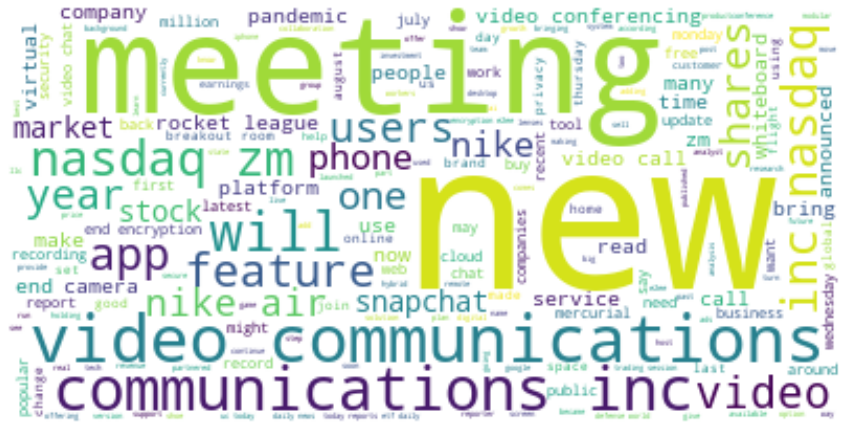

In [16]:
text = " ".join(i for i in data.Message)
print(type(text))


stopwords = set(STOPWORDS)
stopwords = ['.','..','...', stockName.lower()] + list(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()